In [1]:
from IPython.display import IFrame
from IPython.display import Image
from IPython.core.display import display, HTML

## ACS Extractor Python Toolbox

The American Community Survey provides a weath of information between census years, but working with their geodatabases can be a bit difficult. There are probably tools out there than can help with this, but I have packaged my workflow into an ArcPy Toolbox for use with ArcGIS File Geodatabases (although it probably works with Personal Geodatabases too).

The idea is, I need a way to pull out the information I'm intersted in and append it to a subset of the ACS geographic units I'm working with (Zip Code Tabulation Areas, Block Groups, or Tracts). The tables are broken up into different groups, and then each variable is given a column code. There is usually a column for the estimate and a column for the margin of error. My script only pulls out the estimate, which can be a **limitation**. You will probably notice if an estimate seems off, then you can go back to the margin of error to help interpret what is going on.

So I expect that you have downloaded the ACS geodatabase, and have extracted a subset of the data to a new feature class.

The first step is to teach the tools to use the metadata table. So you have to build the metadata list first. Once you do that, a new file will be created in the same folder as the tool, then all the other tools can use this list.

Then you can run the extractor tool to pull out the estimates you want. Followed by the other tools to: add, divide, or rename the tools.

The script mainly assists with the problem of knowing what the field you are working with is, given the code (short_name).

### Build Metadata Field List

This tool should be run first, especially if you are starting out with the toolbox. This will create a file that lets the other tools know the field names and their full names for easier use.

You need to provide the workspace (the ACS geodatabase), the name of the metadata table, and the name of the two columns in the table. For the 5 year 2016 ACS, these two fields were Short_Name and Full_Name. Separate the names with a semi-colon.

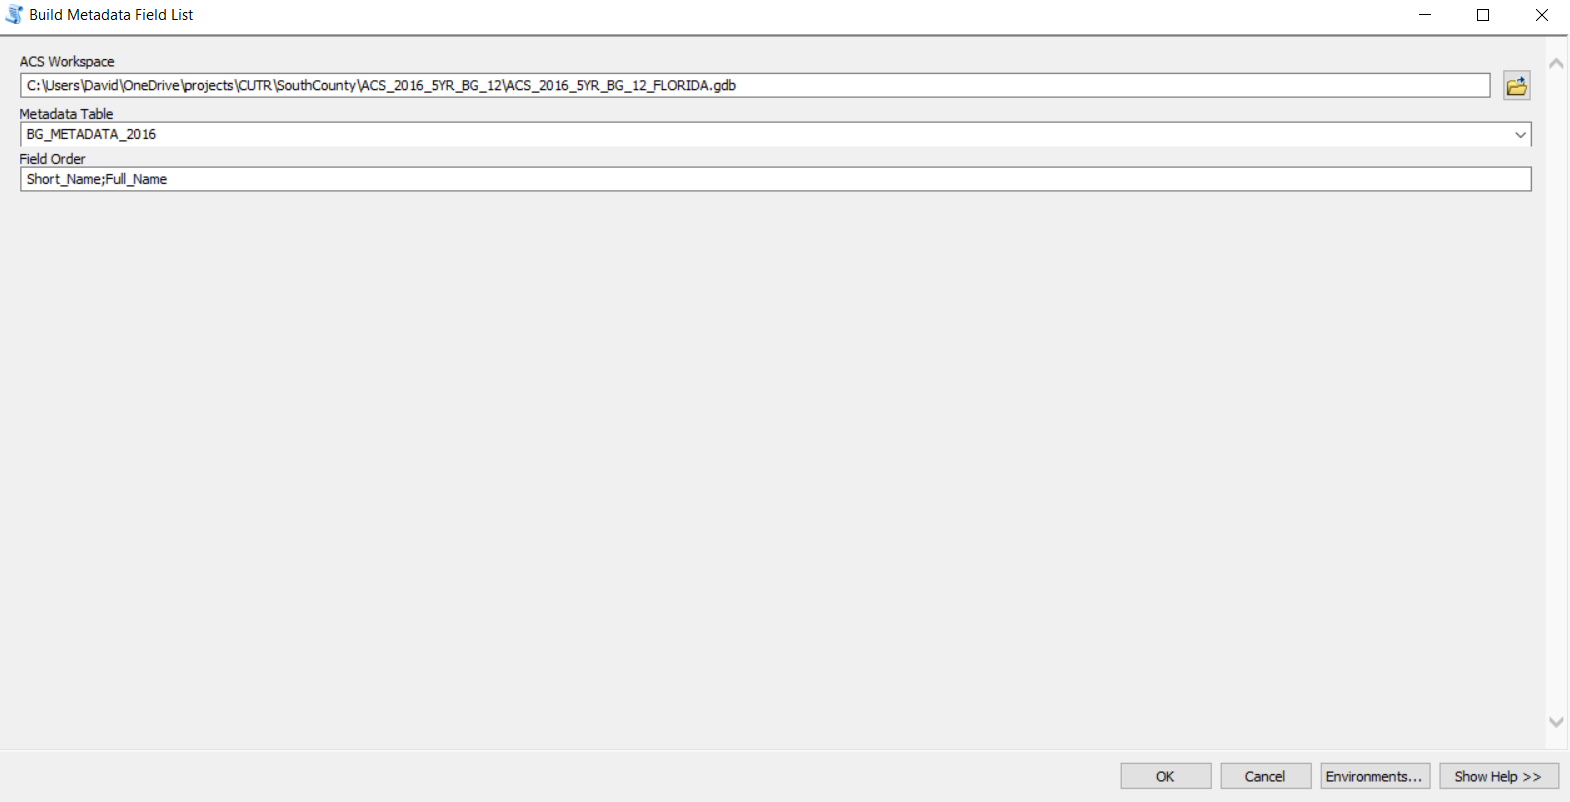

In [3]:
Image(r"C:\Users\David\OneDrive\projects\github\davidlamb.github.io\images\BuildMetadata.PNG")

## Find Field

If you now the Short_Name field information, you can use this script to figure out what Table it is in. You provide the approximate name of the Field, and then the ACS Geodabase Workspace.

The output to the script window gives a list of fields with a close match, and the name of the table it was found in.

They are *close* matches, not exact ones.

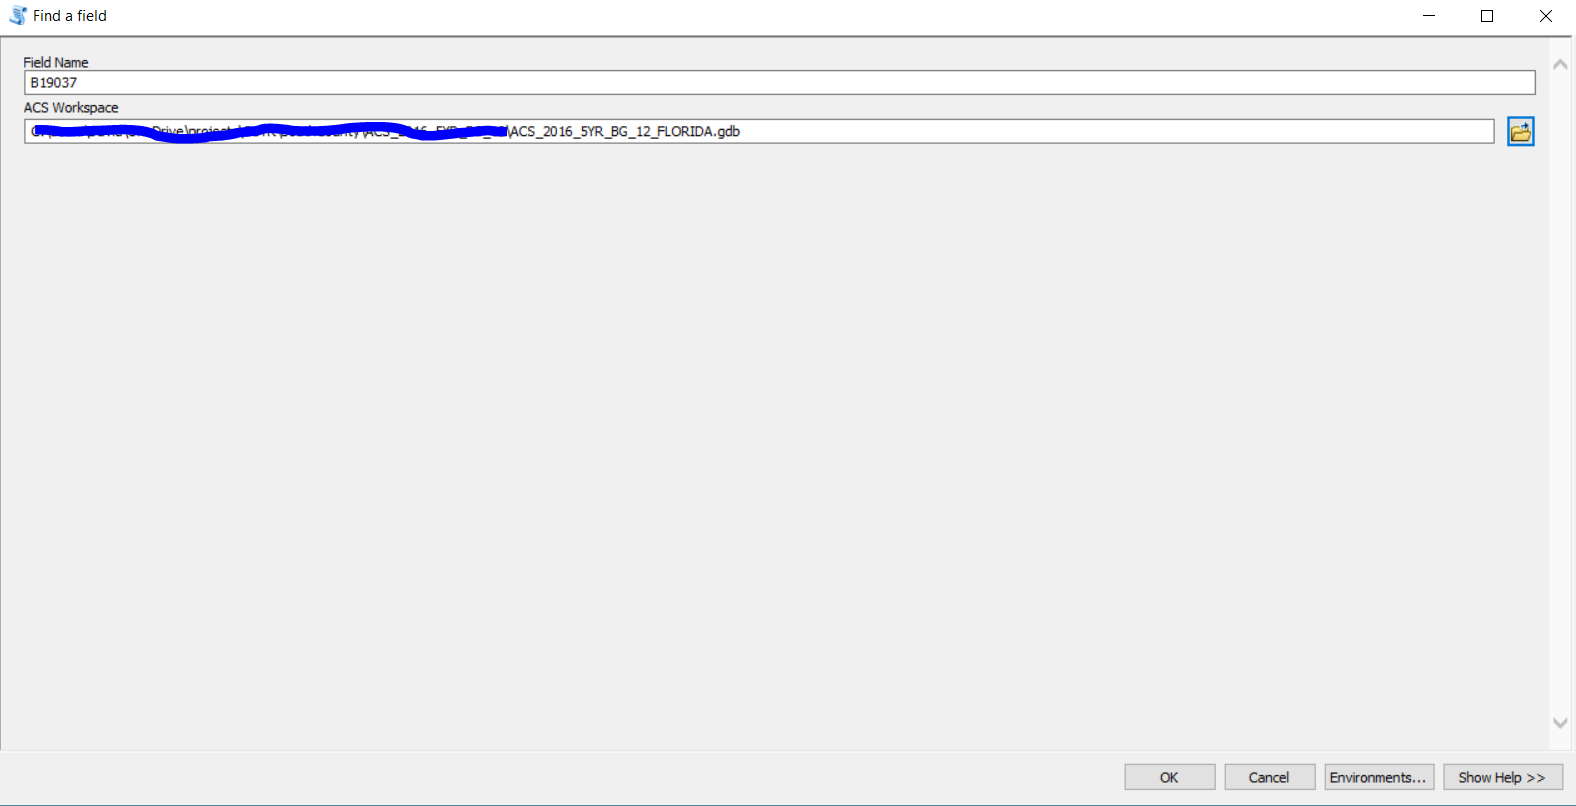

In [4]:
Image(r"C:\Users\David\OneDrive\projects\github\davidlamb.github.io\images\Find Field.PNG")

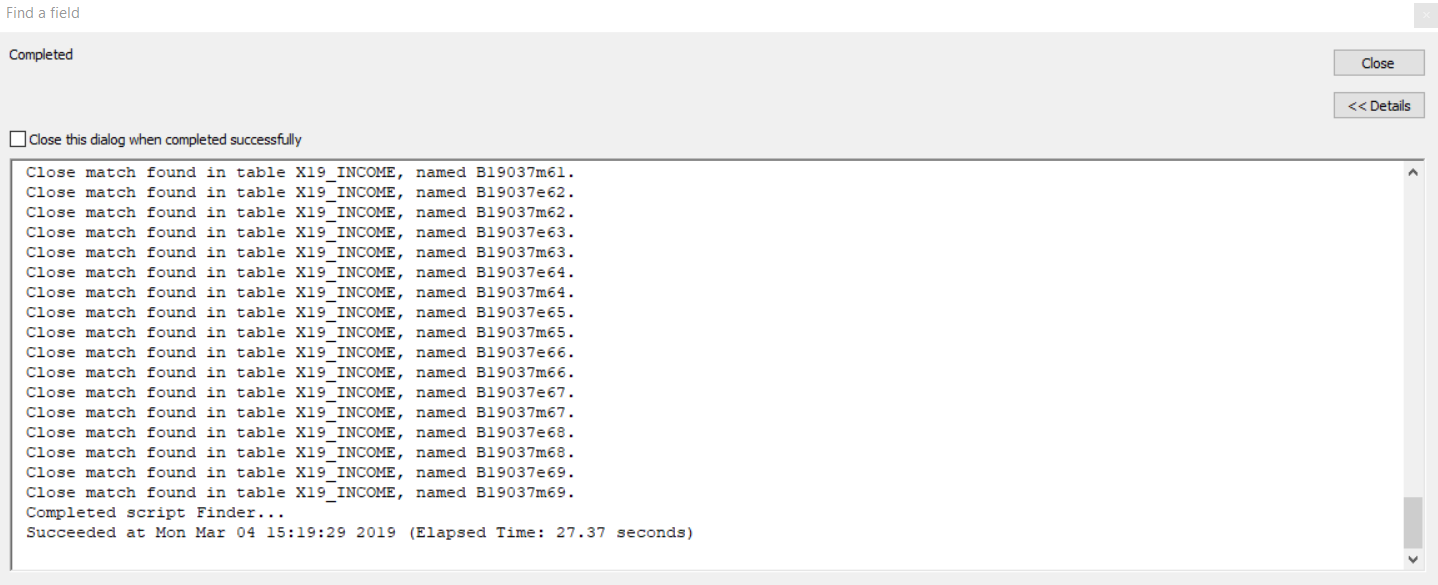

In [5]:
Image(r"C:\Users\David\OneDrive\projects\github\davidlamb.github.io\images\Find Field output.PNG")

## ACS Extract Fields and Values

This tool will take fields from the ACS tables and append it to your subset feature class. I wouldn't recommend running this on all Census Geography units. It works best for a subset of units. If you want all units, you are probably better off joining or relating the tables.

You first select the feature class that contains your subset of data, and the feature class the fields will be appended to.

Then select the matching field/join field. This is probably called GEOID_Data.

Then select the ACS table you want to pull fields from.

Select the matching field / join field in the ACS table. This is probably called GEOID.

Finally, check the fields you would like to copy over.


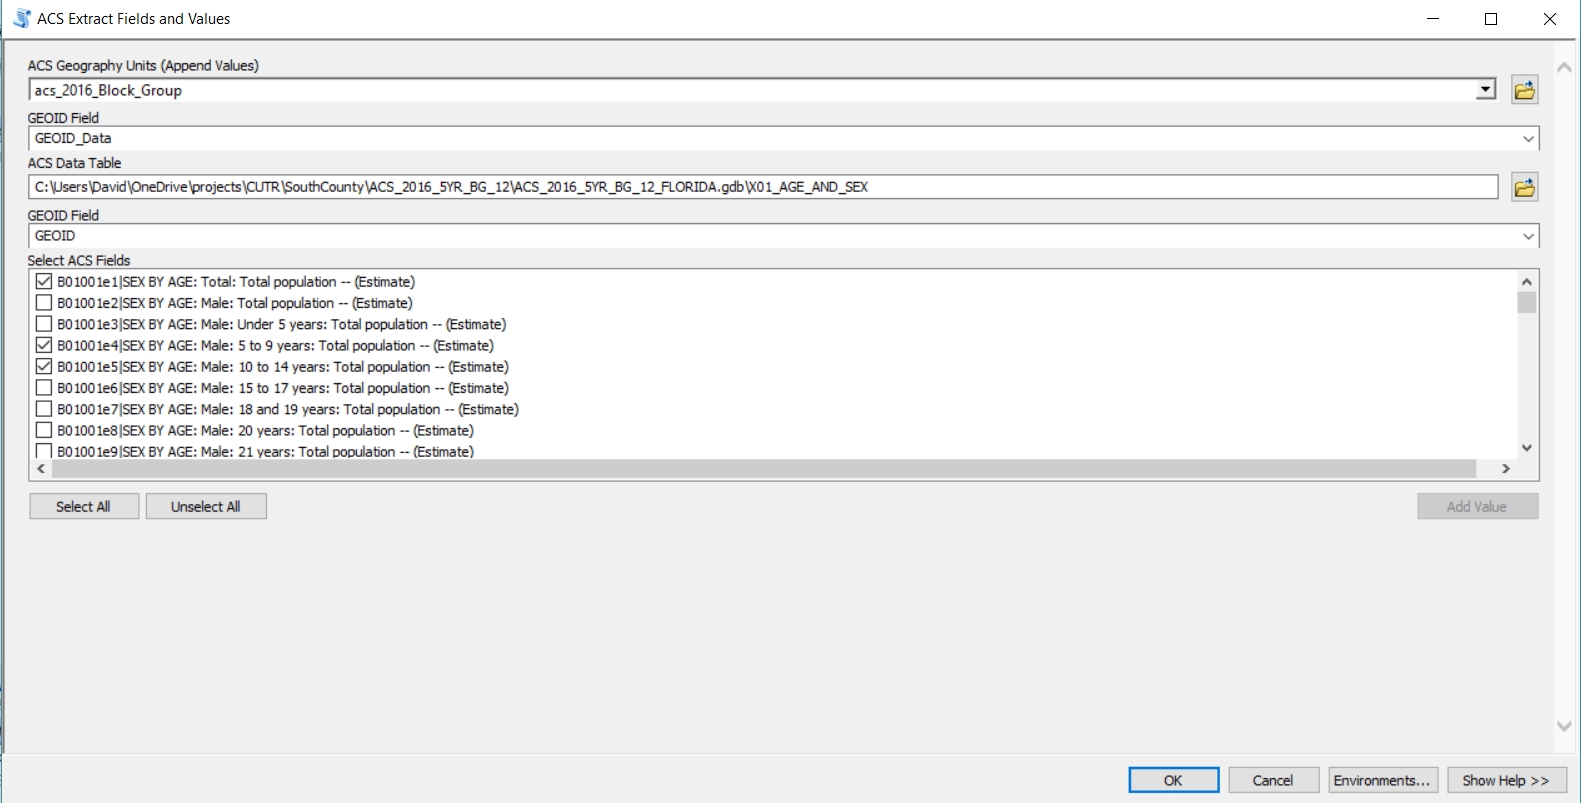

In [6]:
Image(r"C:\Users\David\OneDrive\projects\github\davidlamb.github.io\images\ACS Extract.PNG")

## ACS Combine Fields

Sometimes you need to combine fields to calculate a new total. For example, add several age groups to create a new age group. This tool will help you identify the fields to add together. I assume you have already run the tool to extract the ACS data to your subset feature class.


You first select the feature class that contains your subset of data, and the feature class the fields will be appended to.

Then select the matching field/join field. This is probably called GEOID_Data.

Then check all teh fields you would like to add together.

Provide a name for the new field, and a field alias. The field alias will help you be able to tell what's in the field.

You can optionally check to drop the fields. This will remove the fields that were used to sum. This is useful if you don't want to have too many fields in your feature class.

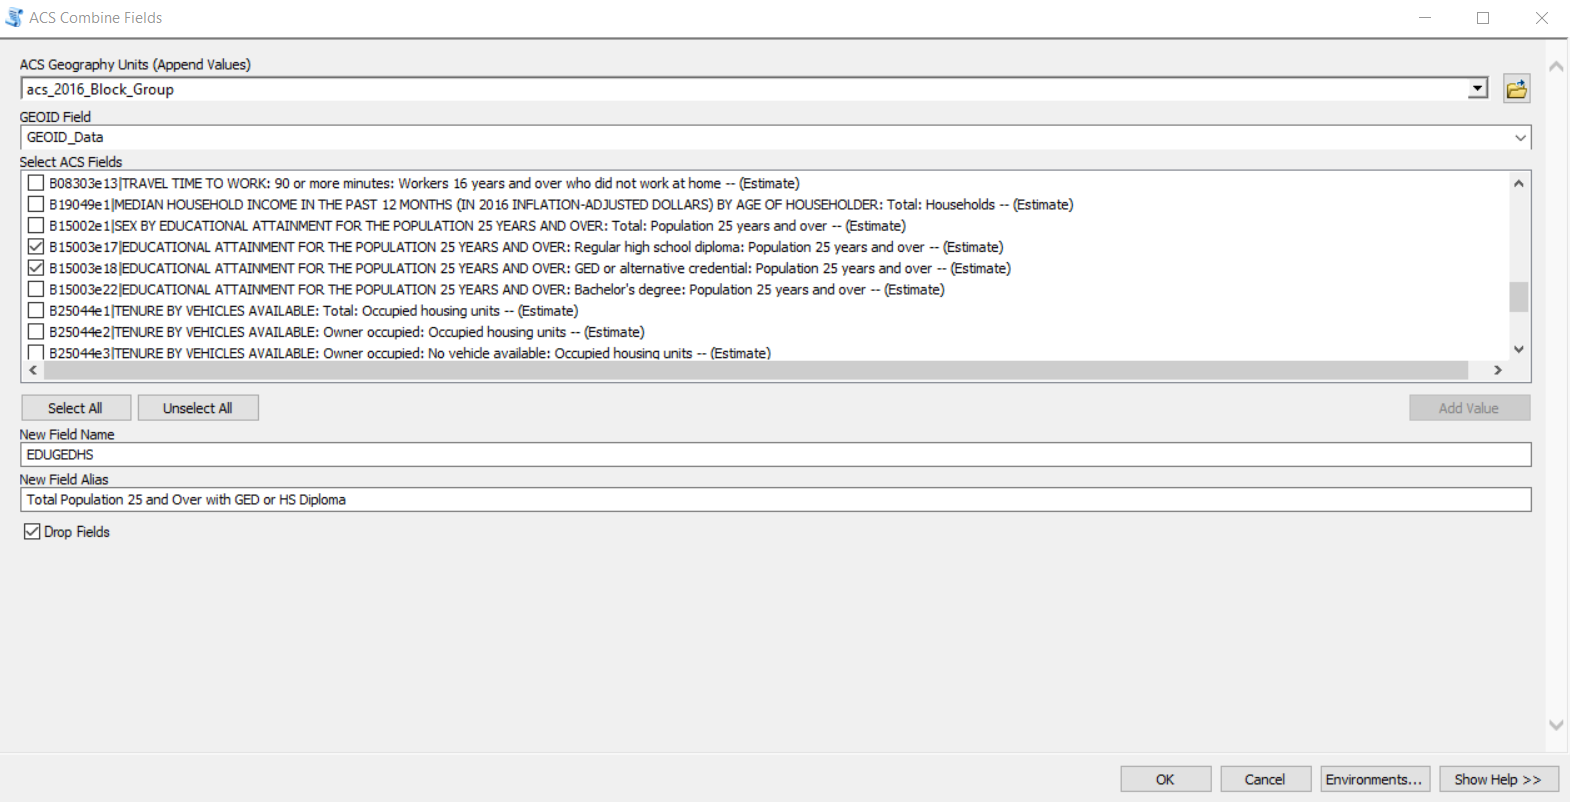

In [7]:
Image(r"C:\Users\David\OneDrive\projects\github\davidlamb.github.io\images\ACS Combine.PNG")

## ACS Divide Fields

Sometimes you need to create a proportion or percentage from the ACS data. For example, percentage of households below the poverty line. This tool will help you divide and create a percentage. I assume you have already run the tool to extract the ACS data to your subset feature class.


You first select the feature class that contains your subset of data, and the feature class the fields will be appended to.

Then select the numerator (or what you want to find the percentage for).

Then select the denominator (or what you want to find the percentage of).

Use the multiplier to cerate a percentage (put 100), otherwise use 1 to get the proportion.

Provide a name for the new field, and a field alias. The field alias will help you be able to tell what's in the field.

Drop fields currently has an error.

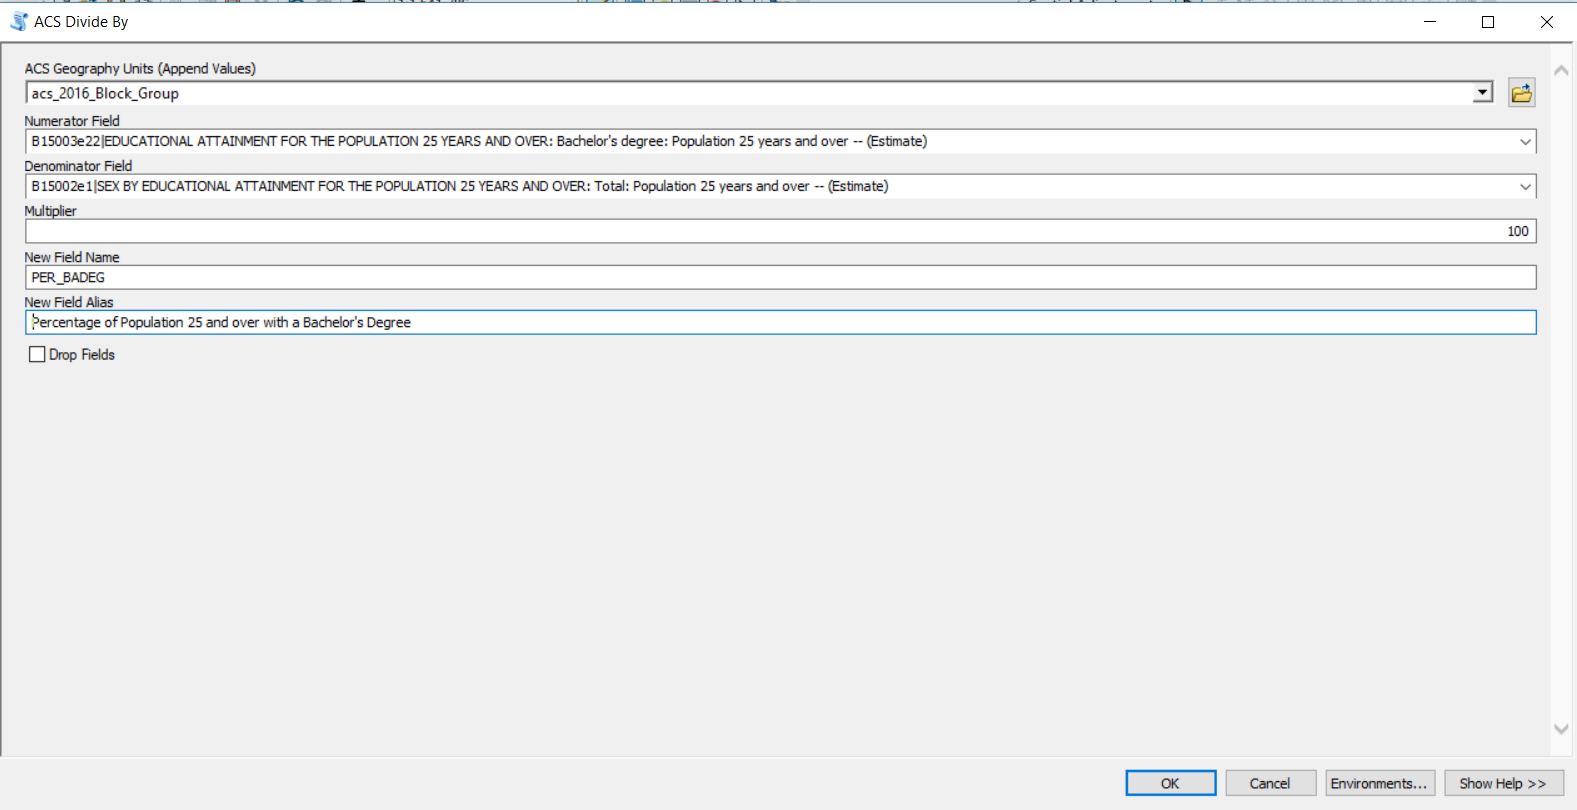

In [8]:
Image(r"C:\Users\David\OneDrive\projects\github\davidlamb.github.io\images\ACS Divide By.PNG")

## ACS Rename Field

Sometimes you don't need to do anything with the field, but would like it to be more readable for later. For example, median income. This tool will help you rename the field. I assume you have already run the tool to extract the ACS data to your subset feature class.


You first select the feature class that contains your subset of data, and the feature class the fields will be appended to.

Select the field that will be renamed.

Then provide a new name and an alias.

Drop field is not relevant.

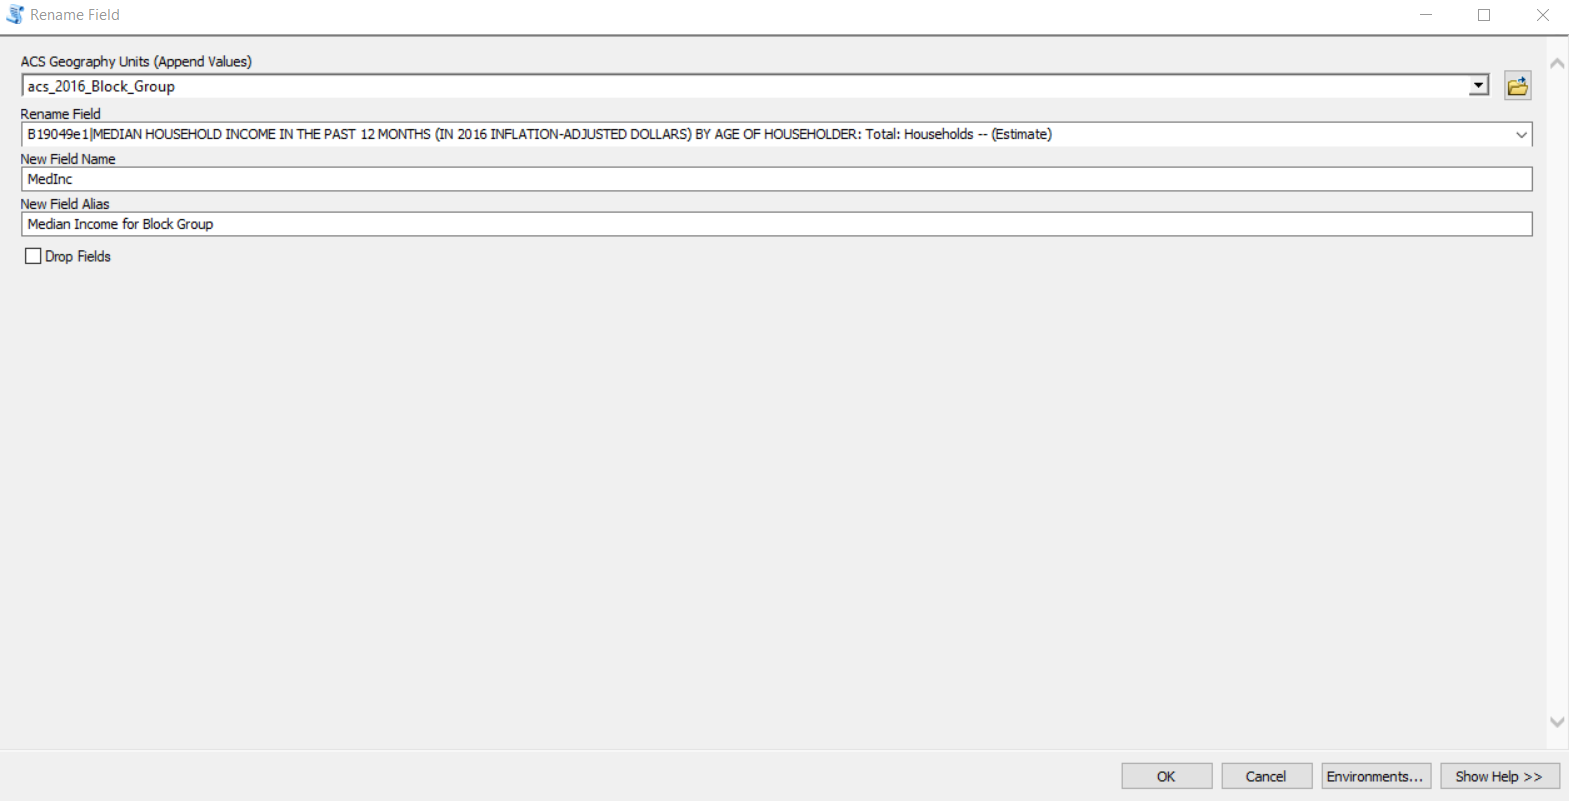

In [10]:
Image(r"C:\Users\David\OneDrive\projects\github\davidlamb.github.io\images\RenameField.PNG")